In [3]:
import os
from openslide import OpenSlide
import numpy as np
from PIL import Image

slide_dir = '/mnt/nfs0/jycho/SLIDE_DATA/록원재단/AT2/C-MET_slide'
slide_list = sorted(os.listdir(slide_dir))

In [4]:
slide = OpenSlide(os.path.join(slide_dir, slide_list[0]))

In [5]:
slide

OpenSlide('/mnt/nfs0/jycho/SLIDE_DATA/록원재단/AT2/C-MET_slide/S-LC0001-MET.svs')

In [6]:
slide.level_dimensions

((117528, 56027), (29382, 14006), (7345, 3501), (3672, 1750))

In [7]:
slide.level_downsamples

(1.0, 4.0001070969584465, 16.002115567875286, 32.0109822595705)

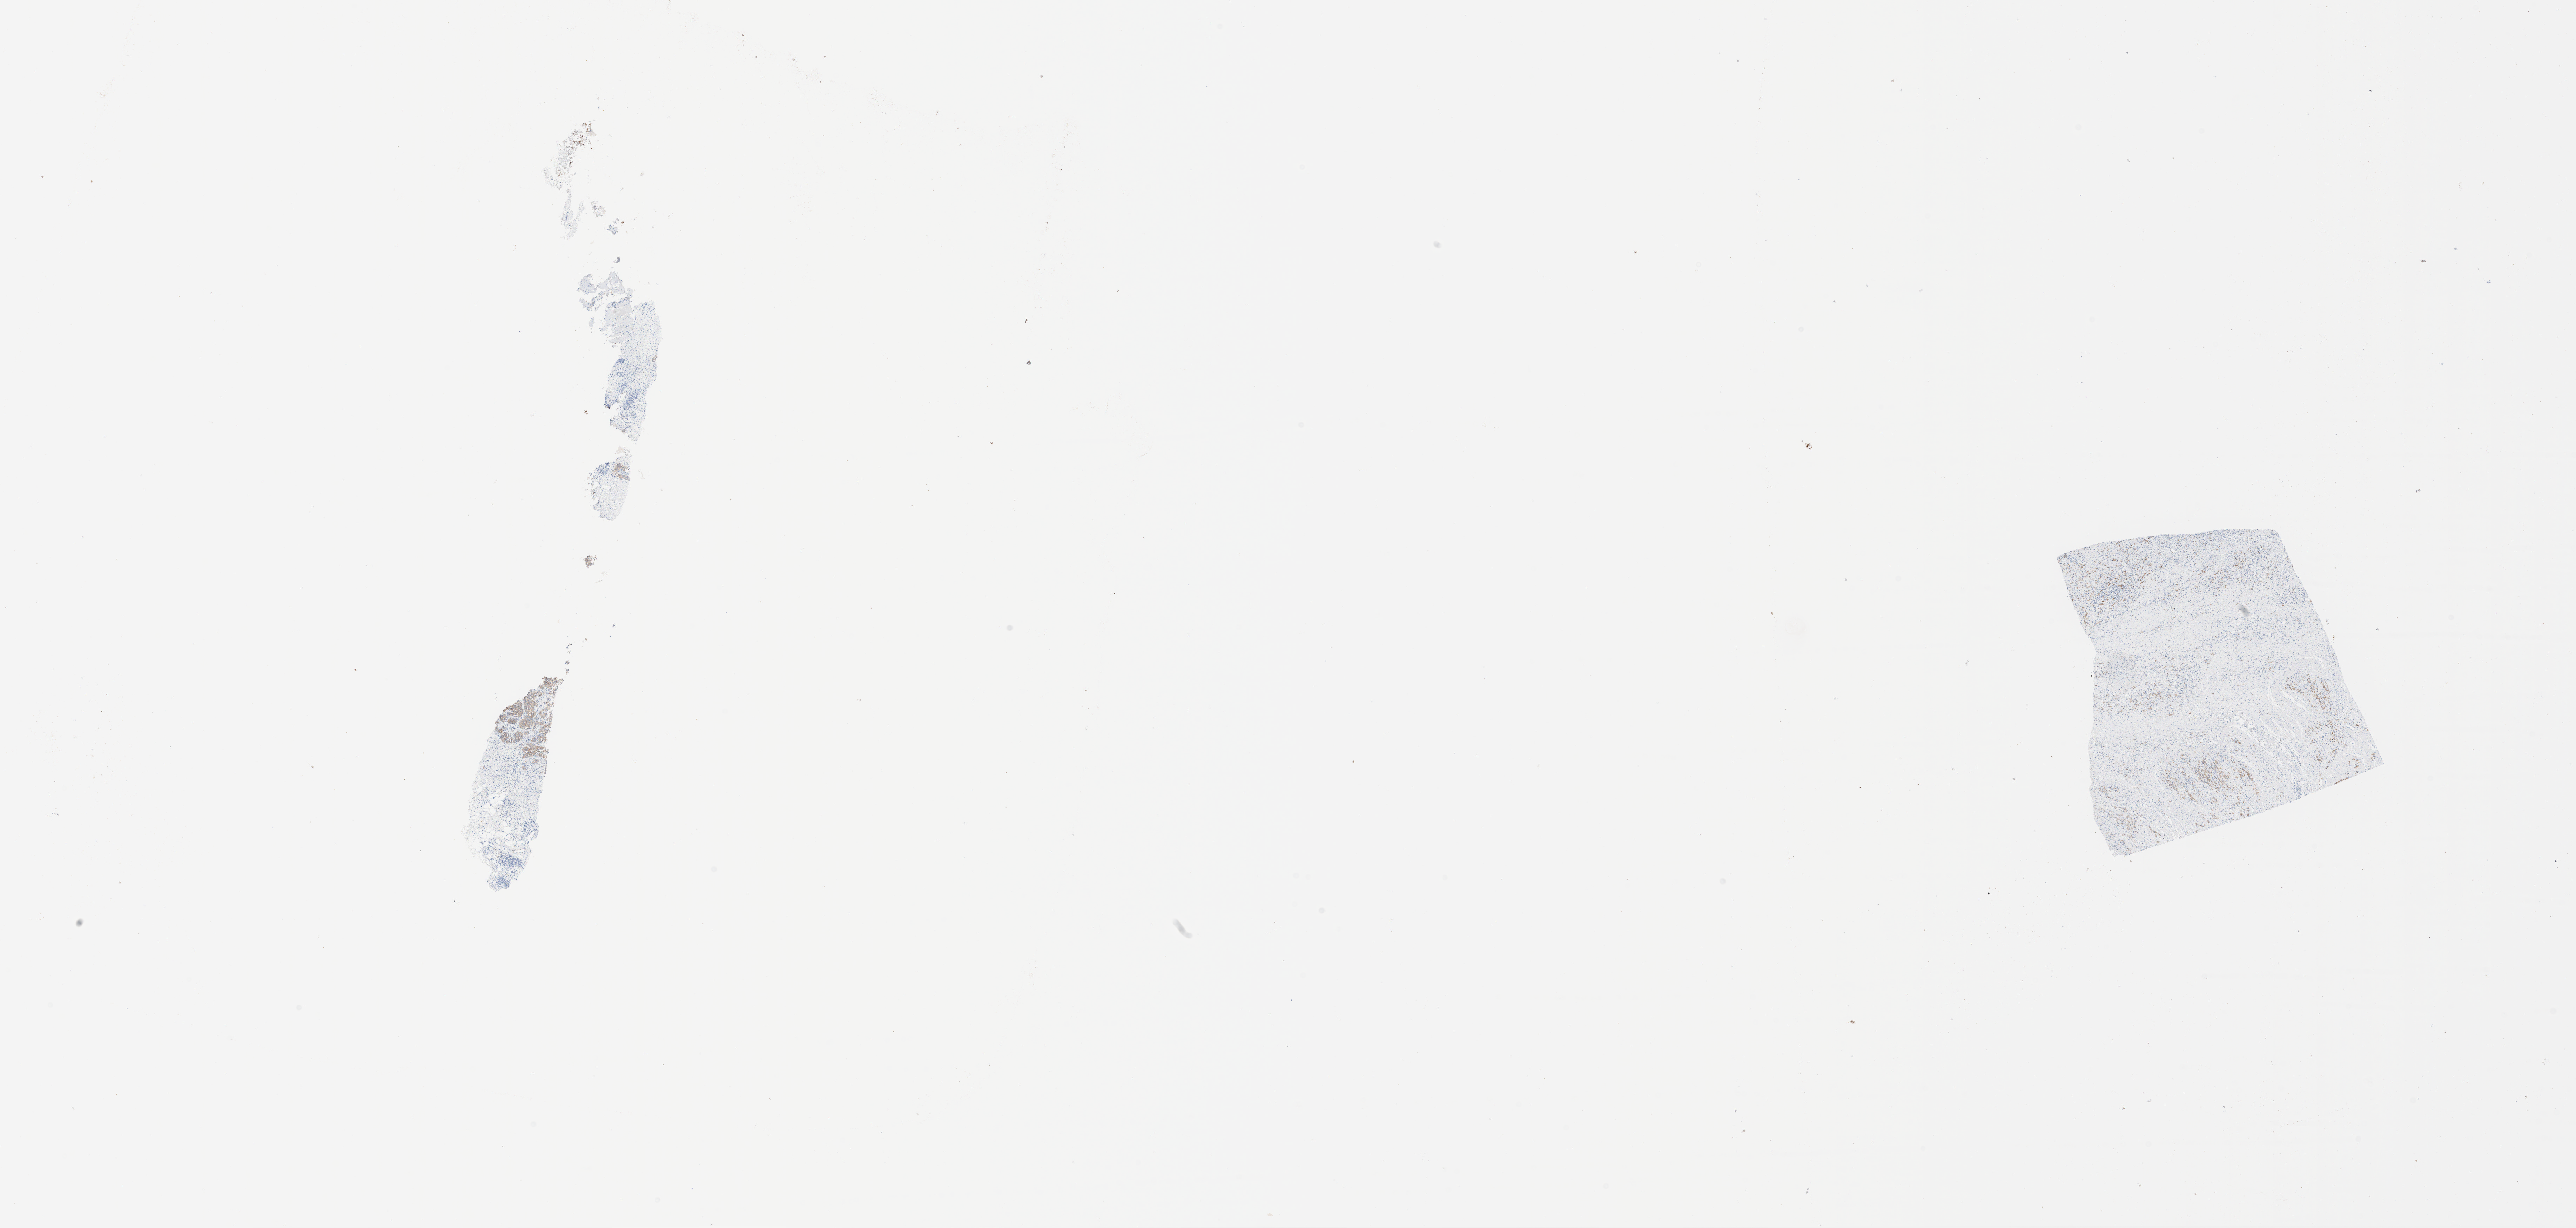

In [19]:
level = 2

slide_thumb = slide.get_thumbnail(slide.level_dimensions[level])

slide_thumb

In [20]:
slide_mask_ratio = round(slide.level_downsamples[level])

In [21]:
slide_mask_ratio

16

In [22]:
slide_rgb = slide_thumb.convert('RGB')
slide_rgb = np.array(slide_rgb)

slide_rgb.shape

(3501, 7345, 3)

In [23]:
slide_mag = 400
patch_mag = 200

target_mask_mag = slide_mag//slide_mask_ratio
target_mask_mag

25

In [36]:
mask = np.zeros(slide_rgb.shape[:2])

mask.shape

(3501, 7345)

In [25]:
patch_dir = '/mnt/ssd1/biomarker/c-met/data/LOGONE_AT2/patch/S-LC0001-MET/200x_1024'

pred_list = [p for p in sorted(os.listdir(patch_dir)) if 'sample_NT_add_ens_pred' in p]
pred_list

['S-LC0001-MET_20480_32768_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_20480_34816_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_20480_36864_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_20480_38912_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_22528_30720_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_22528_32768_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_22528_34816_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_22528_36864_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_22528_38912_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_24576_30720_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_24576_32768_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_24576_34816_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_24576_6144_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_24576_8192_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_26624_10240_0_sample_NT_add_ens_prediction.png',
 'S-LC0001-MET_26624_12288_0_sample_NT_add

In [39]:
import cv2

In [40]:
mask = np.zeros(slide_rgb.shape[:2])

mpp_ratio = slide_mag//patch_mag
patch_size = 1024
mask_step = patch_size*mpp_ratio//slide_mask_ratio

for i in range(len(pred_list)):

    raw_x = int(pred_list[i].split('_')[1])
    raw_y = int(pred_list[i].split('_')[2])

    x = raw_x//slide_mask_ratio
    y = raw_y//slide_mask_ratio

    img = Image.open(os.path.join(patch_dir, pred_list[i])).convert('L')
    img = np.array(img)
    img = cv2.resize(img, (mask_step, mask_step), cv2.INTER_AREA)

    mask[y:y+mask_step, x:x+mask_step] += img



In [41]:
mask.shape

(3501, 7345)

In [42]:
import matplotlib.pyplot as plt

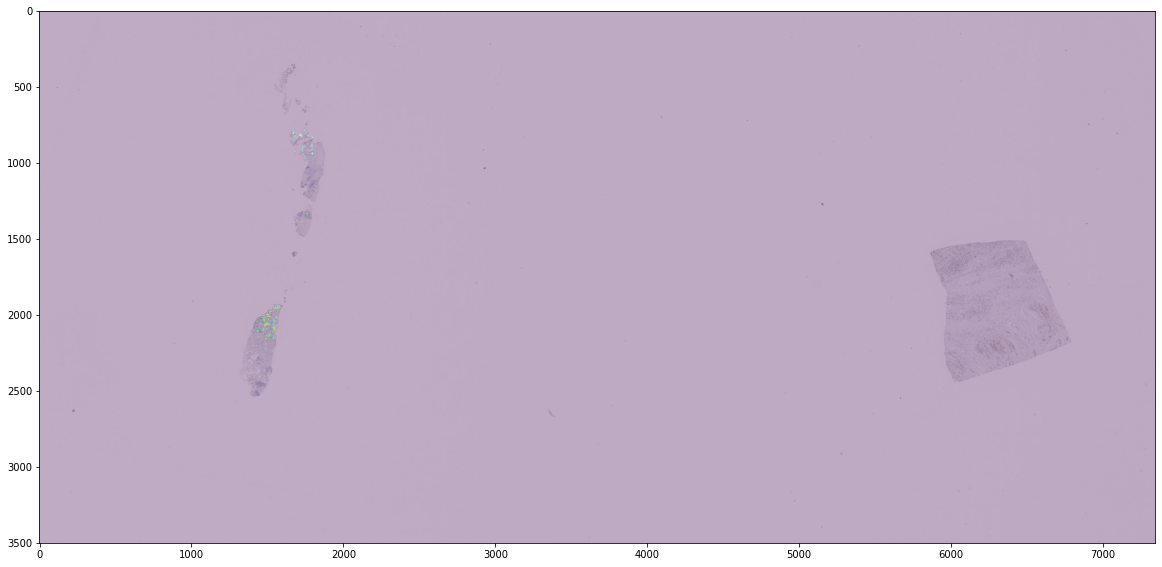

In [46]:
plt.figure(figsize=(20, 10))

plt.imshow(slide_rgb)
plt.imshow(mask, alpha = 0.3)
plt.show()

In [52]:
mask.dtype

dtype('float64')

In [53]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
contours, hierarchy = cv2.findContours(mask.astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [56]:
len(contours)

150

In [47]:
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, SubElement, dump

total = Element("object-stream")
Annotations = Element("Annotations")

"""
<Annotations image="/Users/hyc-deepbio/Desktop/untitled folder/S-LC0027-MET.svs" score="None" primary="None" secondary="None" pni="false" quality="false" inflammation="false" benign="false" type="BRIGHTFIELD_H_DAB">
"""

Annotations.attrib["image"] = slide_list[0]
Annotations.attrib["score"] = ""
Annotations.attrib["primary"] = ""
Annotations.attrib["secondary"] = ""
Annotations.attrib["pni"] = "false"
Annotations.attrib["quality"] = "false"
Annotations.attrib["inflammation"] = "false"
Annotations.attrib["benign"] = "false"
Annotations.attrib["type"] = "BRIGHTFIELD_H_DAB"

Comment  = Element("Comment")
Comment.text = ""
Annotations.append(Comment)



In [58]:
hierarchy

array([[[  1,  -1,  -1,  -1],
        [  2,   0,  -1,  -1],
        [  3,   1,  -1,  -1],
        [  4,   2,  -1,  -1],
        [  5,   3,  -1,  -1],
        [  6,   4,  -1,  -1],
        [  7,   5,  -1,  -1],
        [  8,   6,  -1,  -1],
        [  9,   7,  -1,  -1],
        [ 10,   8,  -1,  -1],
        [ 11,   9,  -1,  -1],
        [ 12,  10,  -1,  -1],
        [ 13,  11,  -1,  -1],
        [ 14,  12,  -1,  -1],
        [ 16,  13,  15,  -1],
        [ -1,  -1,  -1,  14],
        [ 17,  14,  -1,  -1],
        [ 18,  16,  -1,  -1],
        [ 19,  17,  -1,  -1],
        [ 20,  18,  -1,  -1],
        [ 21,  19,  -1,  -1],
        [ 22,  20,  -1,  -1],
        [ 24,  21,  23,  -1],
        [ -1,  -1,  -1,  22],
        [ 26,  22,  25,  -1],
        [ -1,  -1,  -1,  24],
        [ 27,  24,  -1,  -1],
        [ 28,  26,  -1,  -1],
        [ 29,  27,  -1,  -1],
        [ 30,  28,  -1,  -1],
        [ 31,  29,  -1,  -1],
        [ 32,  30,  -1,  -1],
        [ 34,  31,  33,  -1],
        [ 

In [63]:
contours[0].shape

(3, 1, 2)

In [64]:
Annotation_list = []

"""
<Annotation class="Pattern5" type="Area" color="-65536">
"""

for j, contour in enumerate(contours):
    # [이전 윤곽선, 다음 윤곽선, 내곽 윤곽선, 외곽 윤곽선]
    if hierarchy[0][j][3] == -1: #외곽선일 경우
        Annotation = Element("Annotation")
        Annotation.attrib["class"] = "Pattern5"
        Annotation.attrib["type"] = "Area"
        Annotation.attrib["color"] = "-65536"

        Memo = Element("Memo")
        Memo.text = ""
        Annotation.append(Memo)
    else:
        Annotation_list.append(0)
        Annotation = Annotation_list[hierarchy[0][j][3]]

    Coordinates = Element("Coordinates")

    for points in range(contour.shape[0]):
        point_x, point_y = contour[points][0]
        SubElement(Coordinates, "Coordinate", x=str(point_x*(slide_mask_ratio//mpp_ratio)), y=str(point_y*(slide_mask_ratio//mpp_ratio)))

    try:
        Annotation.append(Coordinates)
    except:
        pass

    if hierarchy[0][j][3] == -1:
        Annotation_list.append(Annotation)
    else:
        Annotation_list[hierarchy[0][j][3]] = Annotation

for Anno_candidate in Annotation_list:
    if Anno_candidate:
        Annotations.append(Anno_candidate)

total.append(Annotations)

ET.ElementTree(total).write('/mnt/ssd1/biomarker/c-met/data/LOGONE_AT2/AI_annotation/annotation/'+ f'{slide_list[0][:-4]}.xml')


4096